# What this notebook does:

* This notebook plots usages of cNMF programs in different conditions.
* It generates plots for figures 3C and S5B

# Set up

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as pl, scipy.sparse as ssp
import scanpy as sc,scanpy.external as sce
import sys
sys.path.append('../../helper_functions/')
import helper_functions_py3 as hf

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100)  # low dpi (dots per inch) yields small inline figures

import random
import scipy.stats  as ss
import statsmodels.stats.multitest as multitest
from matplotlib.patches import Rectangle
import seaborn as sn

# Load data

In [2]:
# load indrops data
# update this with the path where your anndata objects are stored !!
anndata_path = '../../data/anndata_objects/'
adata = sc.read_h5ad('../../data/anndata_objects/all_indrops_data.h5ad')

In [3]:
# load cnmf data:
cnmf_dir = '../../data/cnmf/'
spectra = pd.read_csv(cnmf_dir+'program_weights.csv', sep=',', index_col=0).T
usage_matrix = pd.read_csv(cnmf_dir+'program_usages.csv')
normalized_usage_matrix = usage_matrix.div(usage_matrix.sum(axis=1), axis=0)

# Heatmaps

## All conditions combined

In [4]:
# plot program expression for each condition:

condition_list = np.array(['None', 'EGF', 'HGF', 'FGF2', 'IL17A', 'TNFA', 'IGF1', 'Leptin', 'ActA',
       'FGF10', 'Adipo', 'OSM','BMP4', 'CHIR',   'IL13','IFNA','IFNG', 'TGFB1'])

program_names = np.array(['Basal', 'Secretory-1','Secretory-2','Secretory-3',
                        'Multiciliated','Ionocyte/Tuft','PNEC','Cell cycle', 'Ribosomal',
                        'Shared-1','Shared-2','Shared-3',
                        'CHIR','IL13','IFNA','IFNG-1','IFNG-2','IFNG-3','TGFB1-1','TGFB-2'])

condition_usages = np.zeros((condition_list.shape[0],spectra.shape[0]))
for i,conditions in enumerate(condition_list):
    condition_usages[i,:] = np.array(normalized_usage_matrix[np.array(adata.obs.condition == conditions)].mean())
    
condition_usages_pd = pd.DataFrame(condition_usages)
condition_usages_pd.columns = program_names


In [5]:
# perform max - min normalization:
condition_usages_pd_norm = (condition_usages_pd - condition_usages_pd.min(axis=0))/(condition_usages_pd.max(0)-condition_usages_pd.min(0))

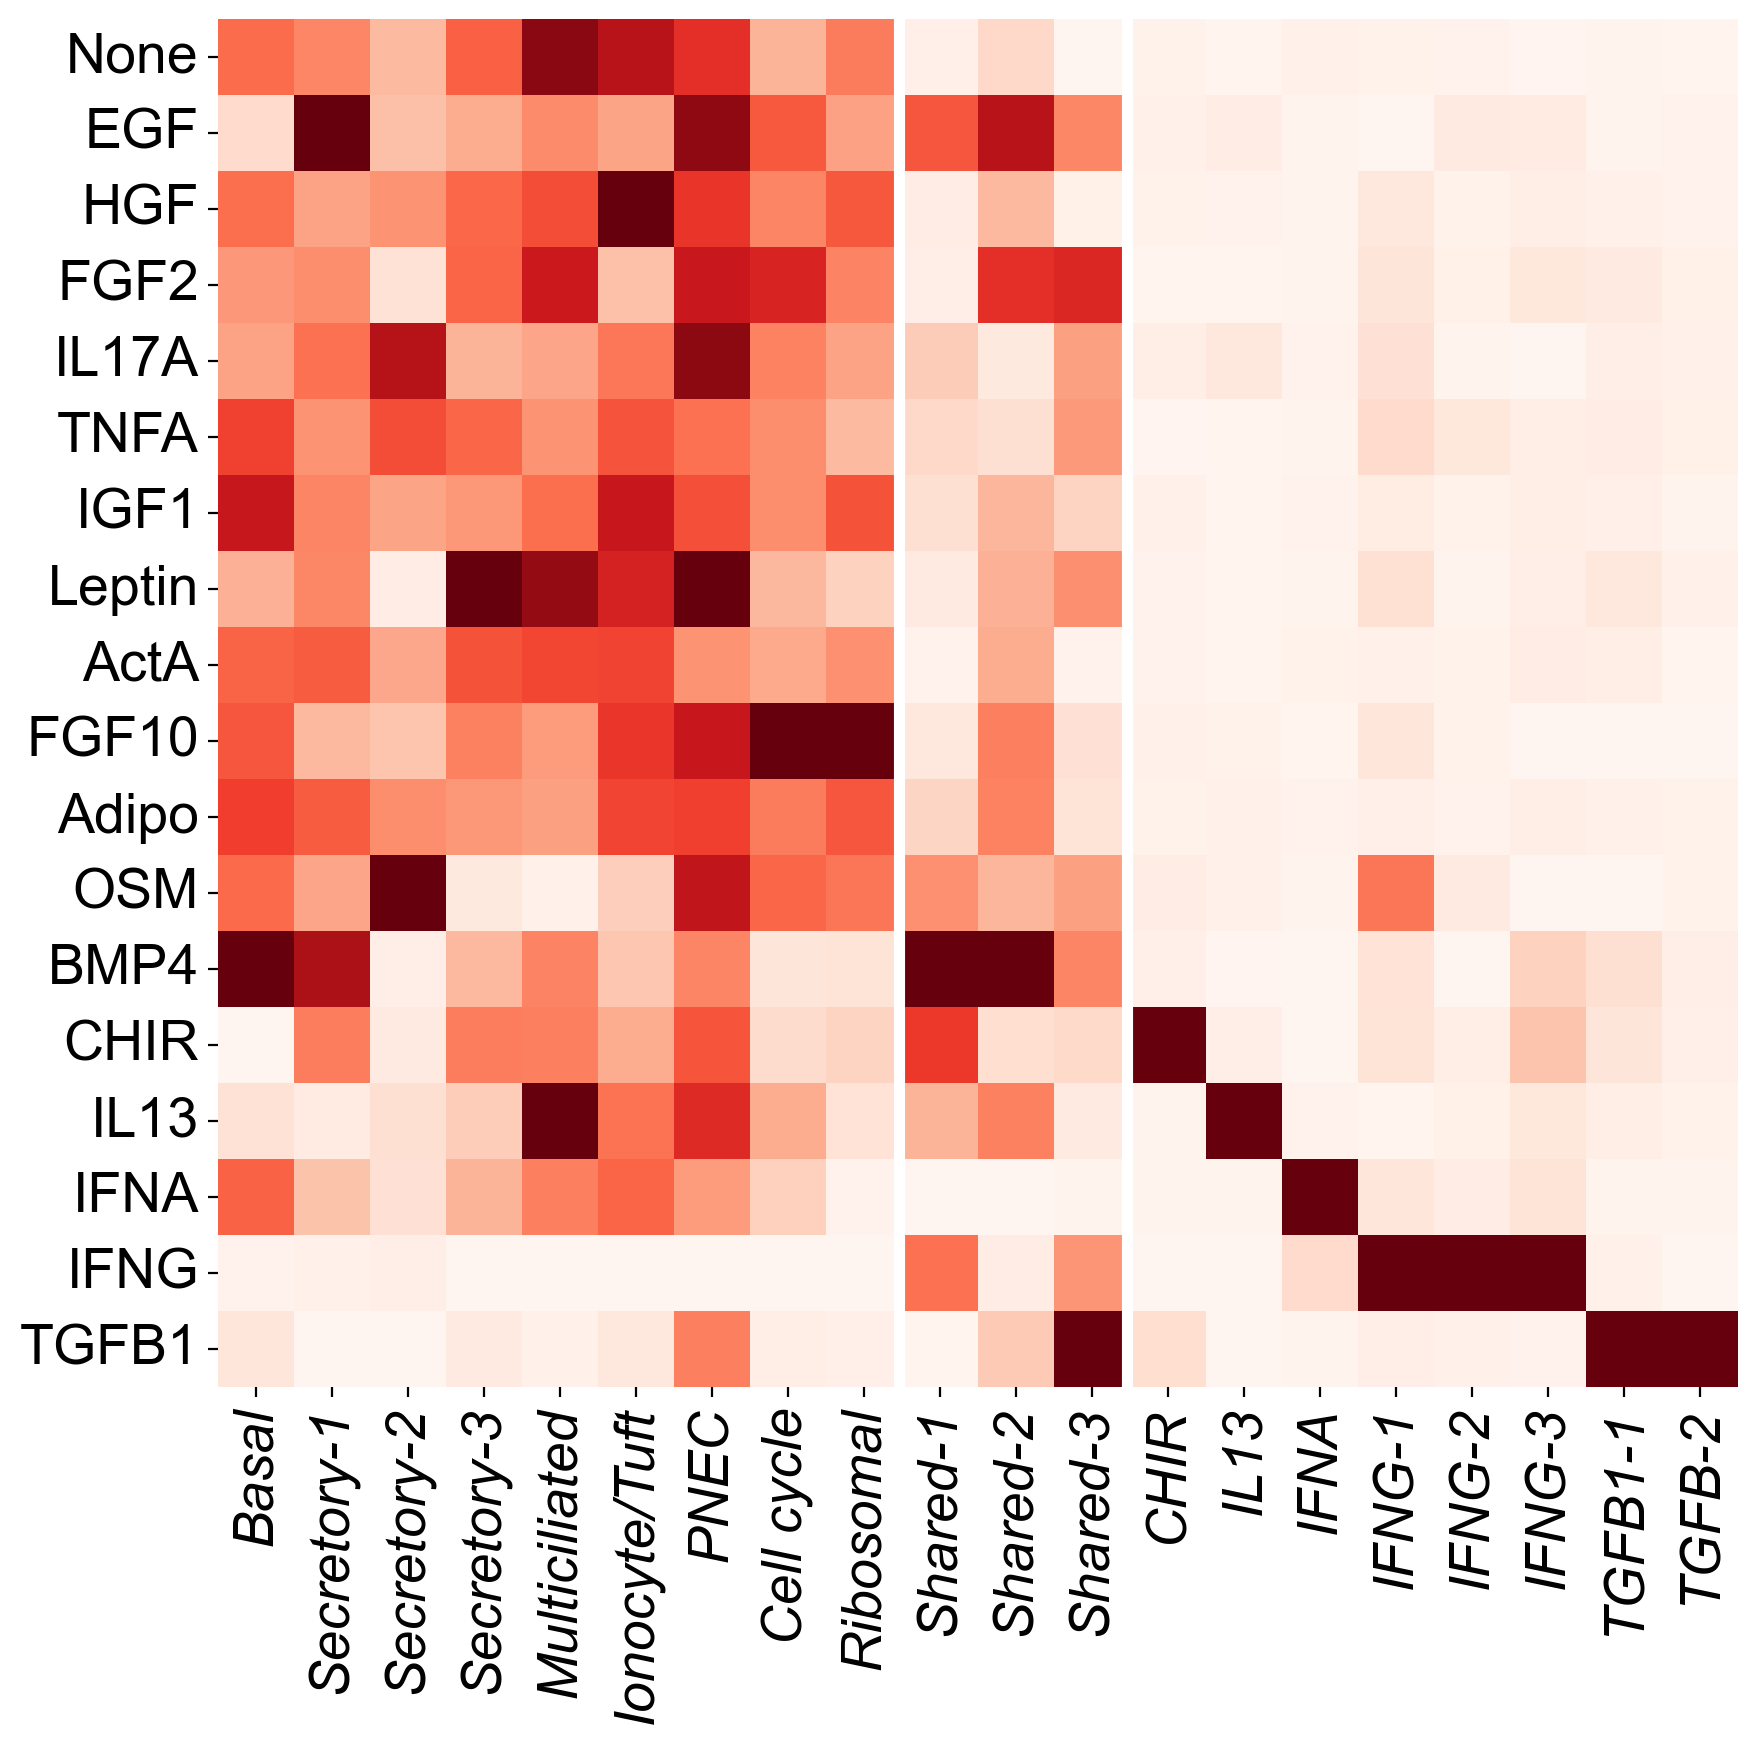

In [6]:
# plot the heatmap
f = pl.figure(figsize = (condition_usages_pd.shape[1]/2,
                         condition_usages_pd.shape[0]/2))
sn.heatmap(condition_usages_pd_norm,
           cmap = 'Reds', square = True, cbar = False, yticklabels=condition_list, rasterized=True)

#pl.axhline(1, color='white', lw=5)
pl.axvline(11.95, color='white', lw=4)

pl.axvline(8.95, color='white', lw=4)

pl.yticks(fontname = 'Arial', fontsize = 20)
bla = pl.xticks(np.arange(condition_usages_pd.shape[1])+0.5, labels = program_names, 
                fontsize = 20, rotation = 90, style = 'italic')



## Donors separated

### Donor 1

In [7]:
adata1= adata[adata.obs.assigned_donor == 'donor_1'].copy()
normalized_usage_matrix1 = normalized_usage_matrix.loc[np.array(adata.obs.assigned_donor == 'donor_1'),:]
normalized_usage_matrix1.index = np.arange(normalized_usage_matrix1.shape[0])

condition_usages1 = np.zeros((condition_list.shape[0],spectra.shape[0]))
for i,conditions in enumerate(condition_list):
    condition_usages1[i,:] = np.array(normalized_usage_matrix1[np.array(adata1.obs.condition == conditions)].mean())
    
condition_usages1_pd = pd.DataFrame(condition_usages1)
condition_usages1_pd.columns = program_names
condition_usages1_pd.index = condition_list

In [8]:
# max - min normalization:
condition_usages1_pd_norm = (condition_usages1_pd - condition_usages1_pd.min(axis=0))/(condition_usages1_pd.max(0)-condition_usages1_pd.min(0))

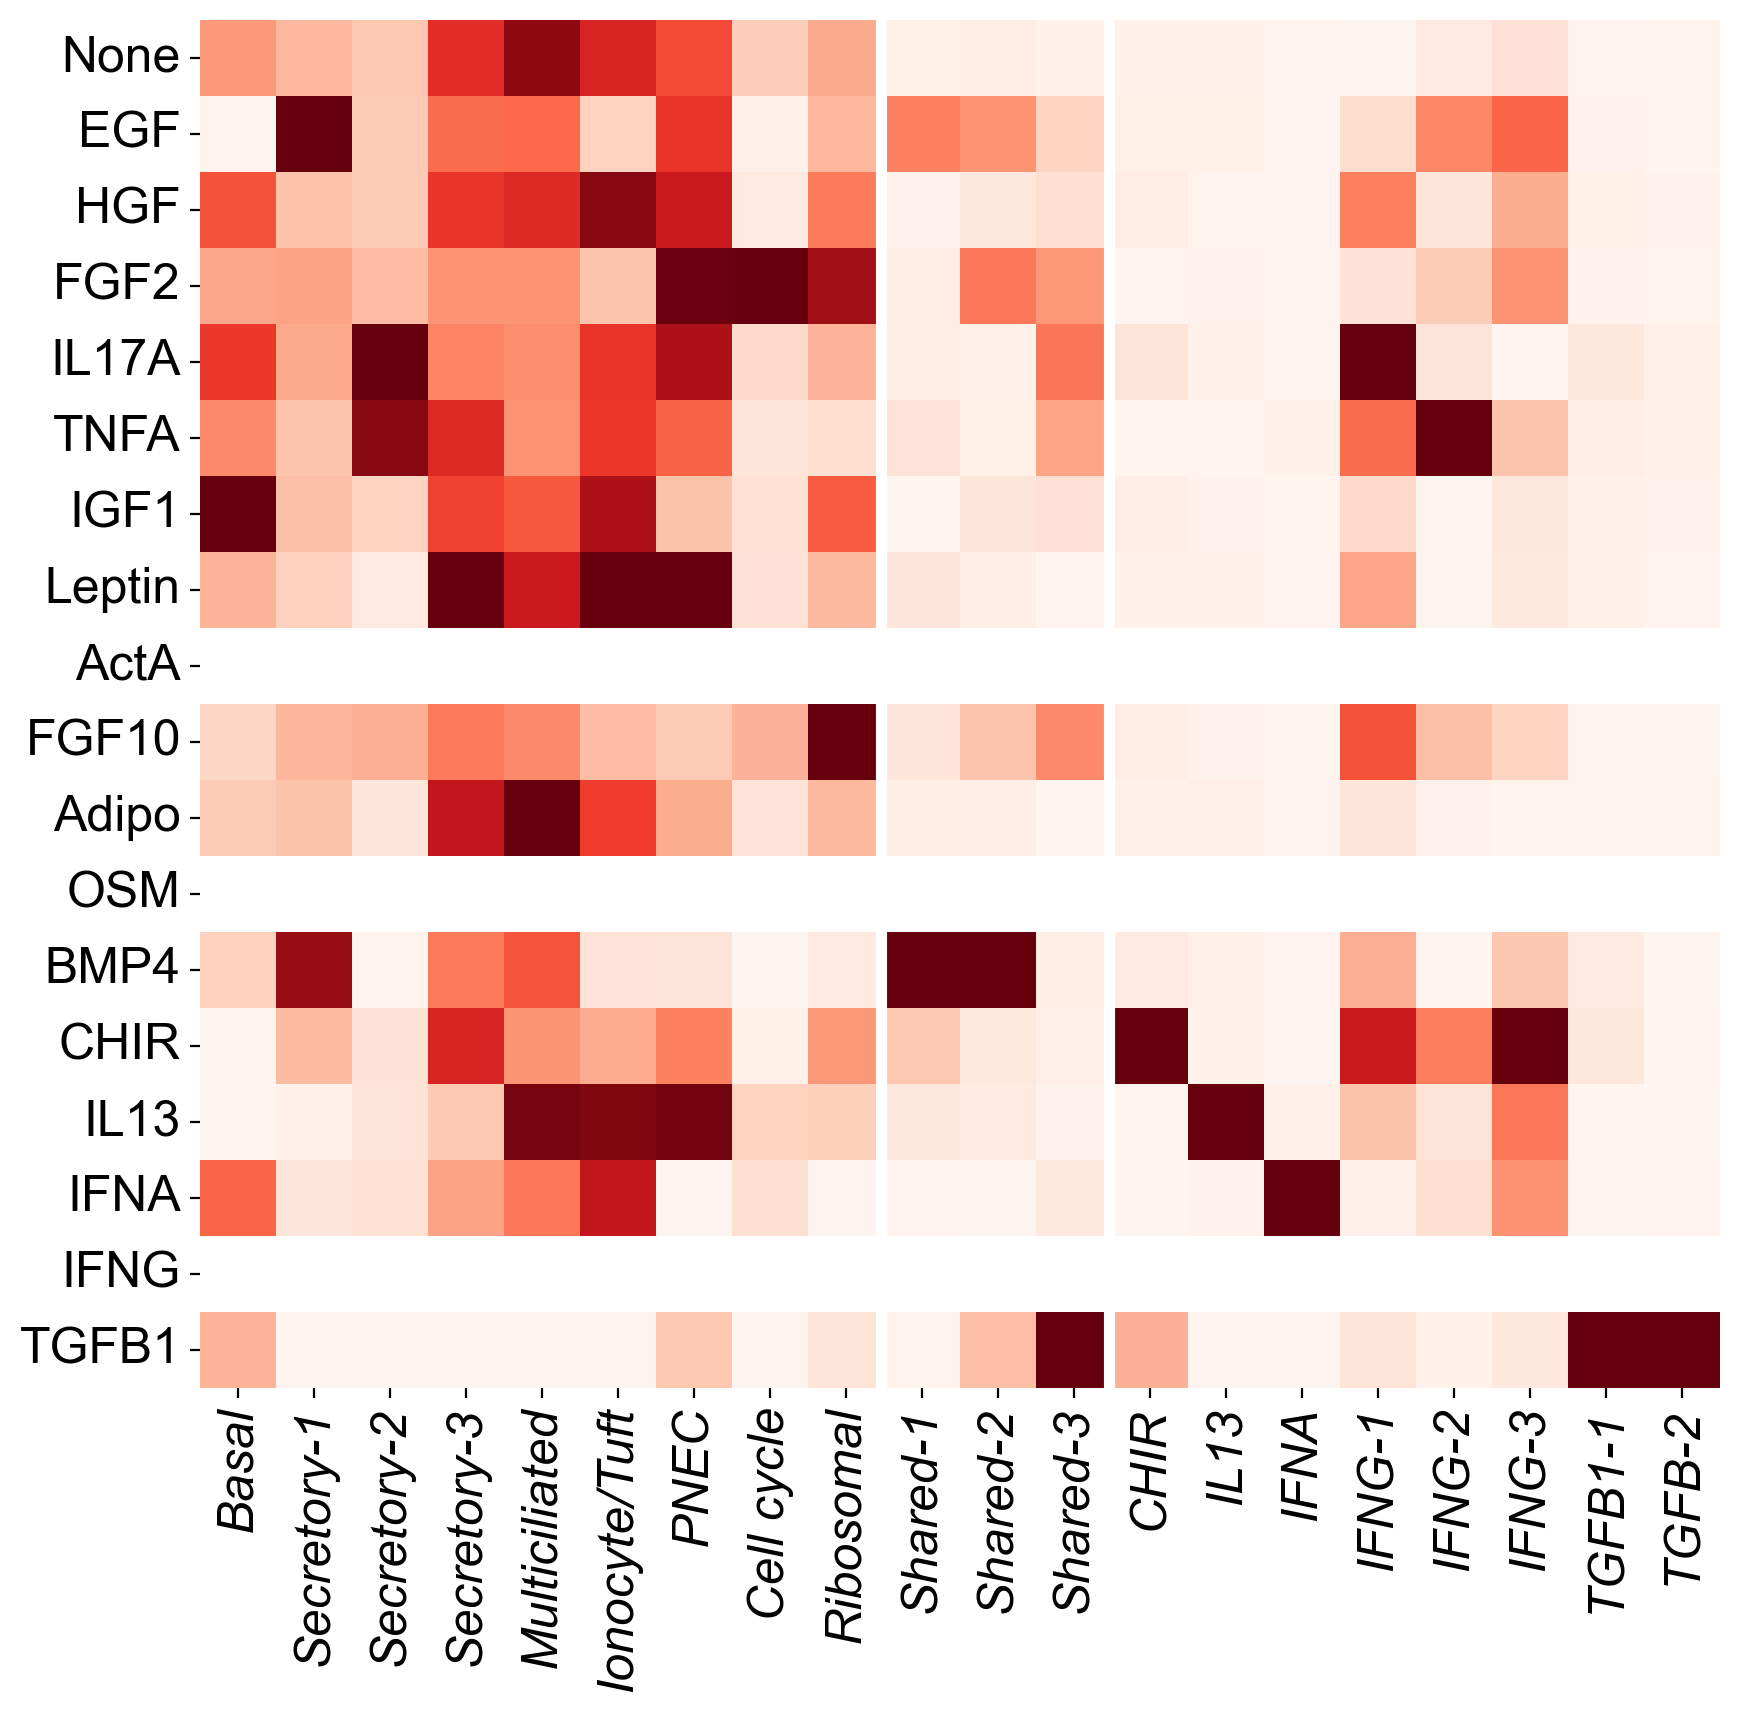

In [9]:
# plot heatmap:
f = pl.figure(figsize = (condition_usages1_pd.shape[1]/2,
                         condition_usages1_pd.shape[0]/2))
sn.heatmap(condition_usages1_pd_norm,
           cmap = 'Reds', square = True, cbar = False, yticklabels=condition_list)

#pl.axhline(1, color='white', lw=5)
pl.axvline(11.95, color='white', lw=4)

pl.axvline(8.95, color='white', lw=4)

pl.yticks(fontname = 'Arial', fontsize = 18)
bla = pl.xticks(np.arange(condition_usages1_pd.shape[1])+0.5, labels = program_names, 
                fontsize = 18, rotation = 90, style = 'italic')


### Donor 2

In [10]:
adata2= adata[adata.obs.assigned_donor == 'donor_2'].copy()
normalized_usage_matrix2 = normalized_usage_matrix.loc[np.array(adata.obs.assigned_donor == 'donor_2'),:]
normalized_usage_matrix2.index = np.arange(normalized_usage_matrix2.shape[0])

condition_usages2 = np.zeros((condition_list.shape[0],spectra.shape[0]))
for i,conditions in enumerate(condition_list):
    condition_usages2[i,:] = np.array(normalized_usage_matrix2[np.array(adata2.obs.condition == conditions)].mean())
    
condition_usages2_pd = pd.DataFrame(condition_usages2)
condition_usages2_pd.columns = program_names
condition_usages2_pd.index = condition_list

In [11]:
# max - min normalization:
condition_usages2_pd_norm = (condition_usages2_pd - condition_usages2_pd.min(axis=0))/(condition_usages2_pd.max(0)-condition_usages2_pd.min(0))

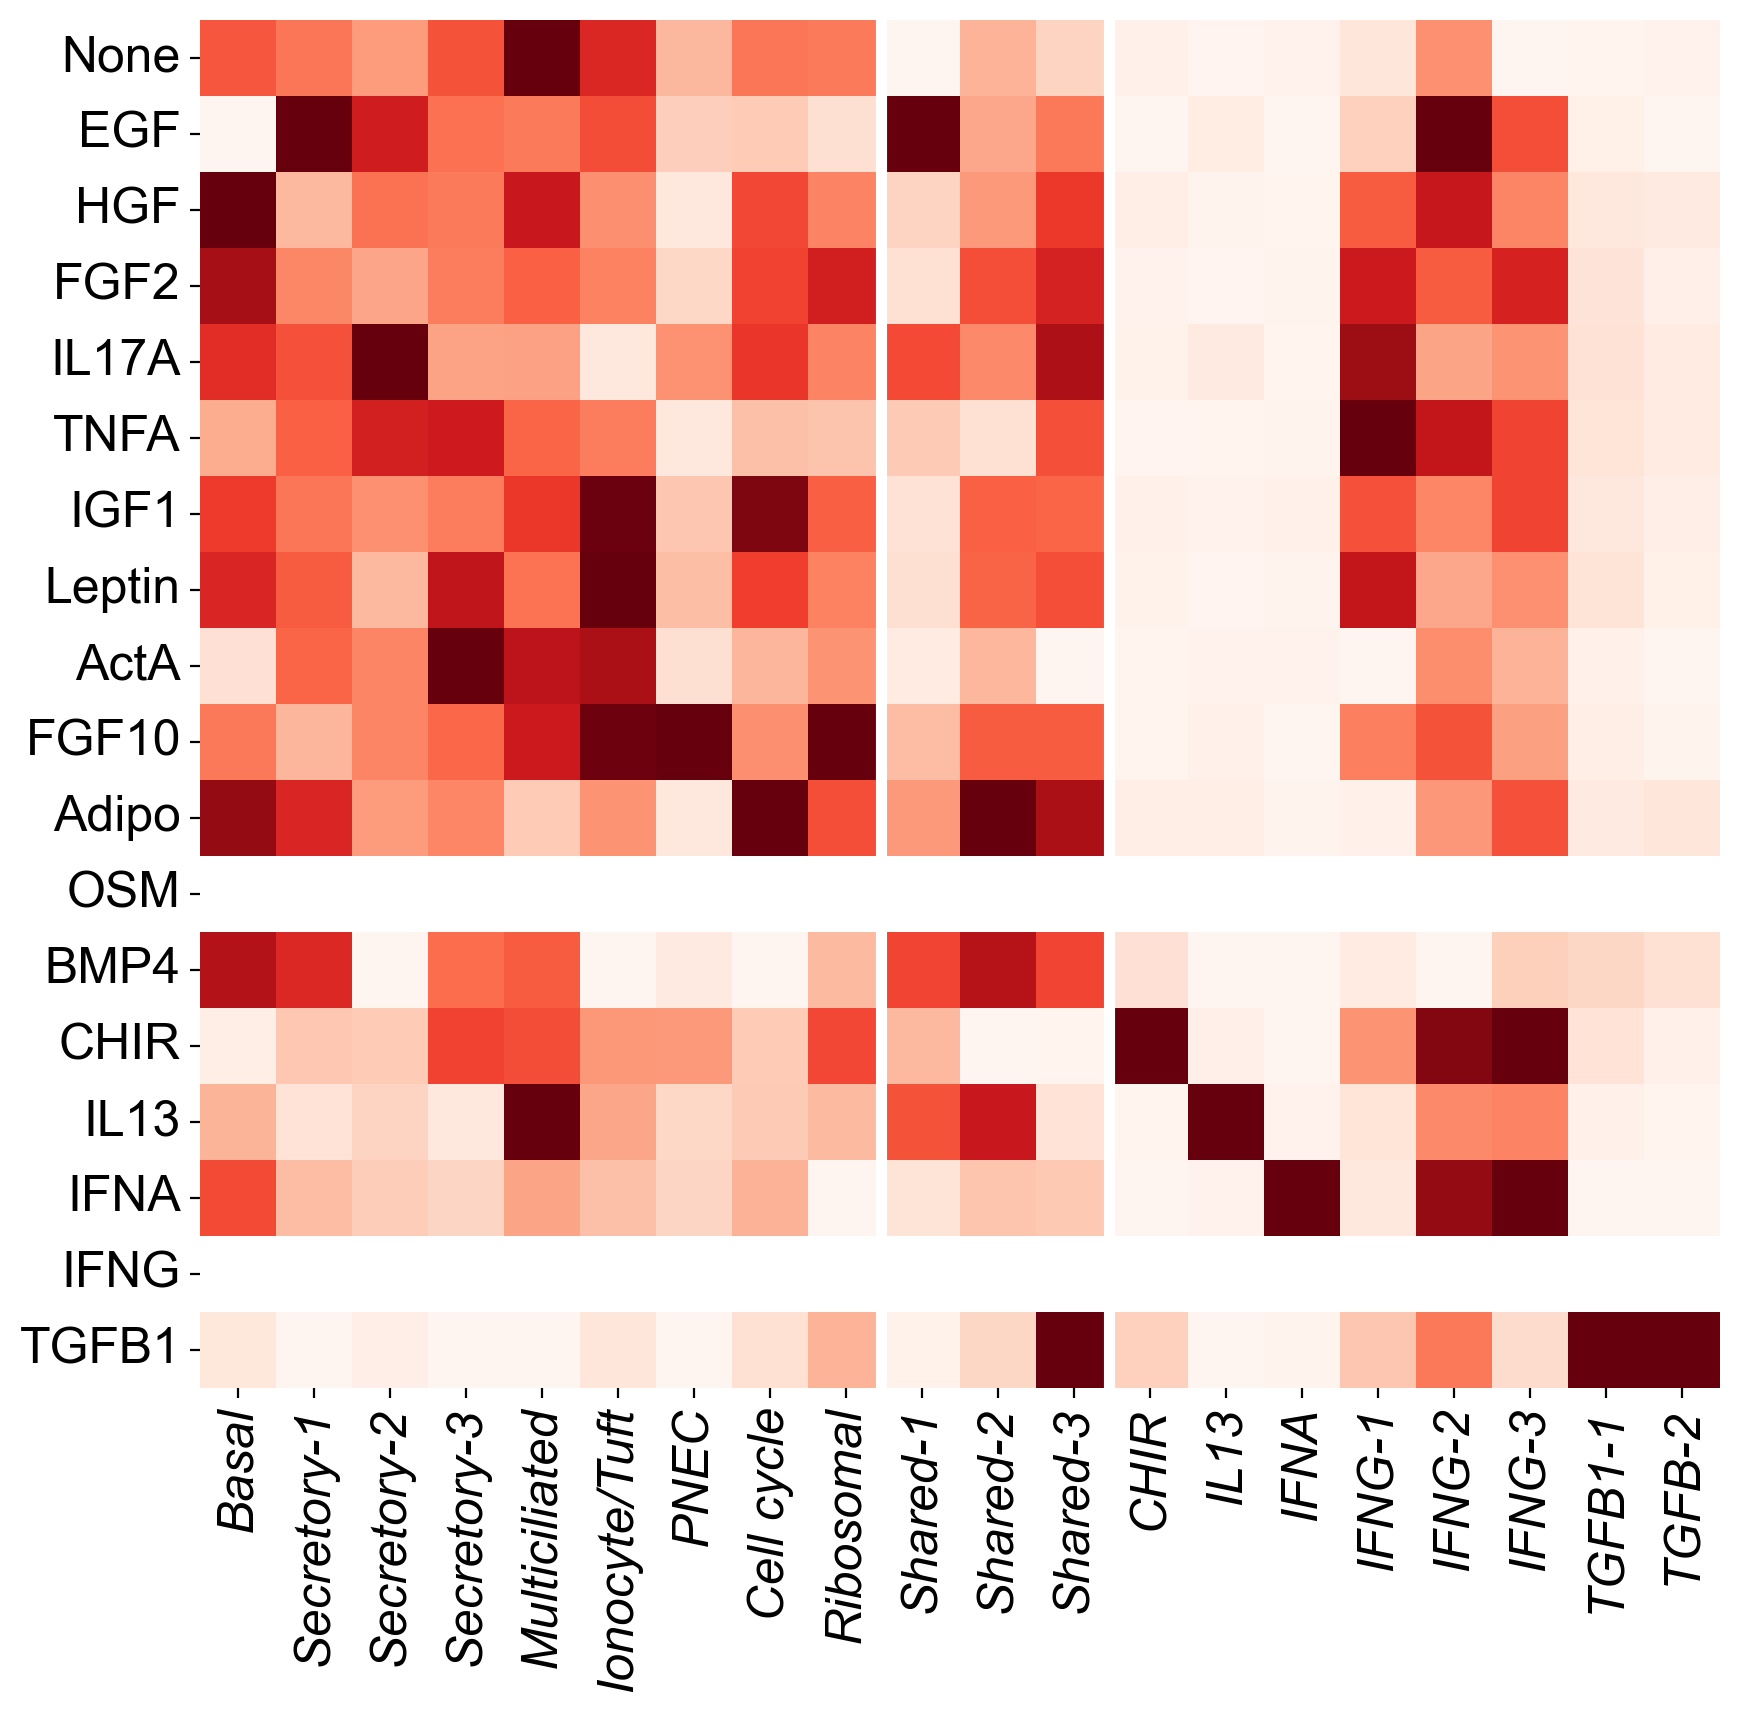

In [12]:
# plot heatmap:

f = pl.figure(figsize = (condition_usages2_pd.shape[1]/2,
                         condition_usages2_pd.shape[0]/2))
sn.heatmap(condition_usages2_pd_norm,
           cmap = 'Reds', square = True, cbar = False, yticklabels=condition_list)

#pl.axhline(1, color='white', lw=5)
pl.axvline(11.95, color='white', lw=4)

pl.axvline(8.95, color='white', lw=4)

pl.yticks(fontname = 'Arial', fontsize = 18)
bla = pl.xticks(np.arange(condition_usages2_pd.shape[1])+0.5, labels = program_names, 
                fontsize = 18, rotation = 90, style = 'italic')


### Donor 3

In [13]:
adata3= adata[adata.obs.assigned_donor == 'donor_3'].copy()
normalized_usage_matrix3 = normalized_usage_matrix.loc[np.array(adata.obs.assigned_donor == 'donor_3'),:]
normalized_usage_matrix3.index = np.arange(normalized_usage_matrix3.shape[0])

condition_usages3 = np.zeros((condition_list.shape[0],spectra.shape[0]))
for i,conditions in enumerate(condition_list):
    condition_usages3[i,:] = np.array(normalized_usage_matrix3[np.array(adata3.obs.condition == conditions)].mean())
    
condition_usages3_pd = pd.DataFrame(condition_usages3)
condition_usages3_pd.columns = program_names
condition_usages3_pd.index = condition_list

In [14]:
# max - min normalization:
condition_usages3_pd_norm = (condition_usages3_pd - condition_usages3_pd.min(axis=0))/(condition_usages3_pd.max(0)-condition_usages3_pd.min(0))

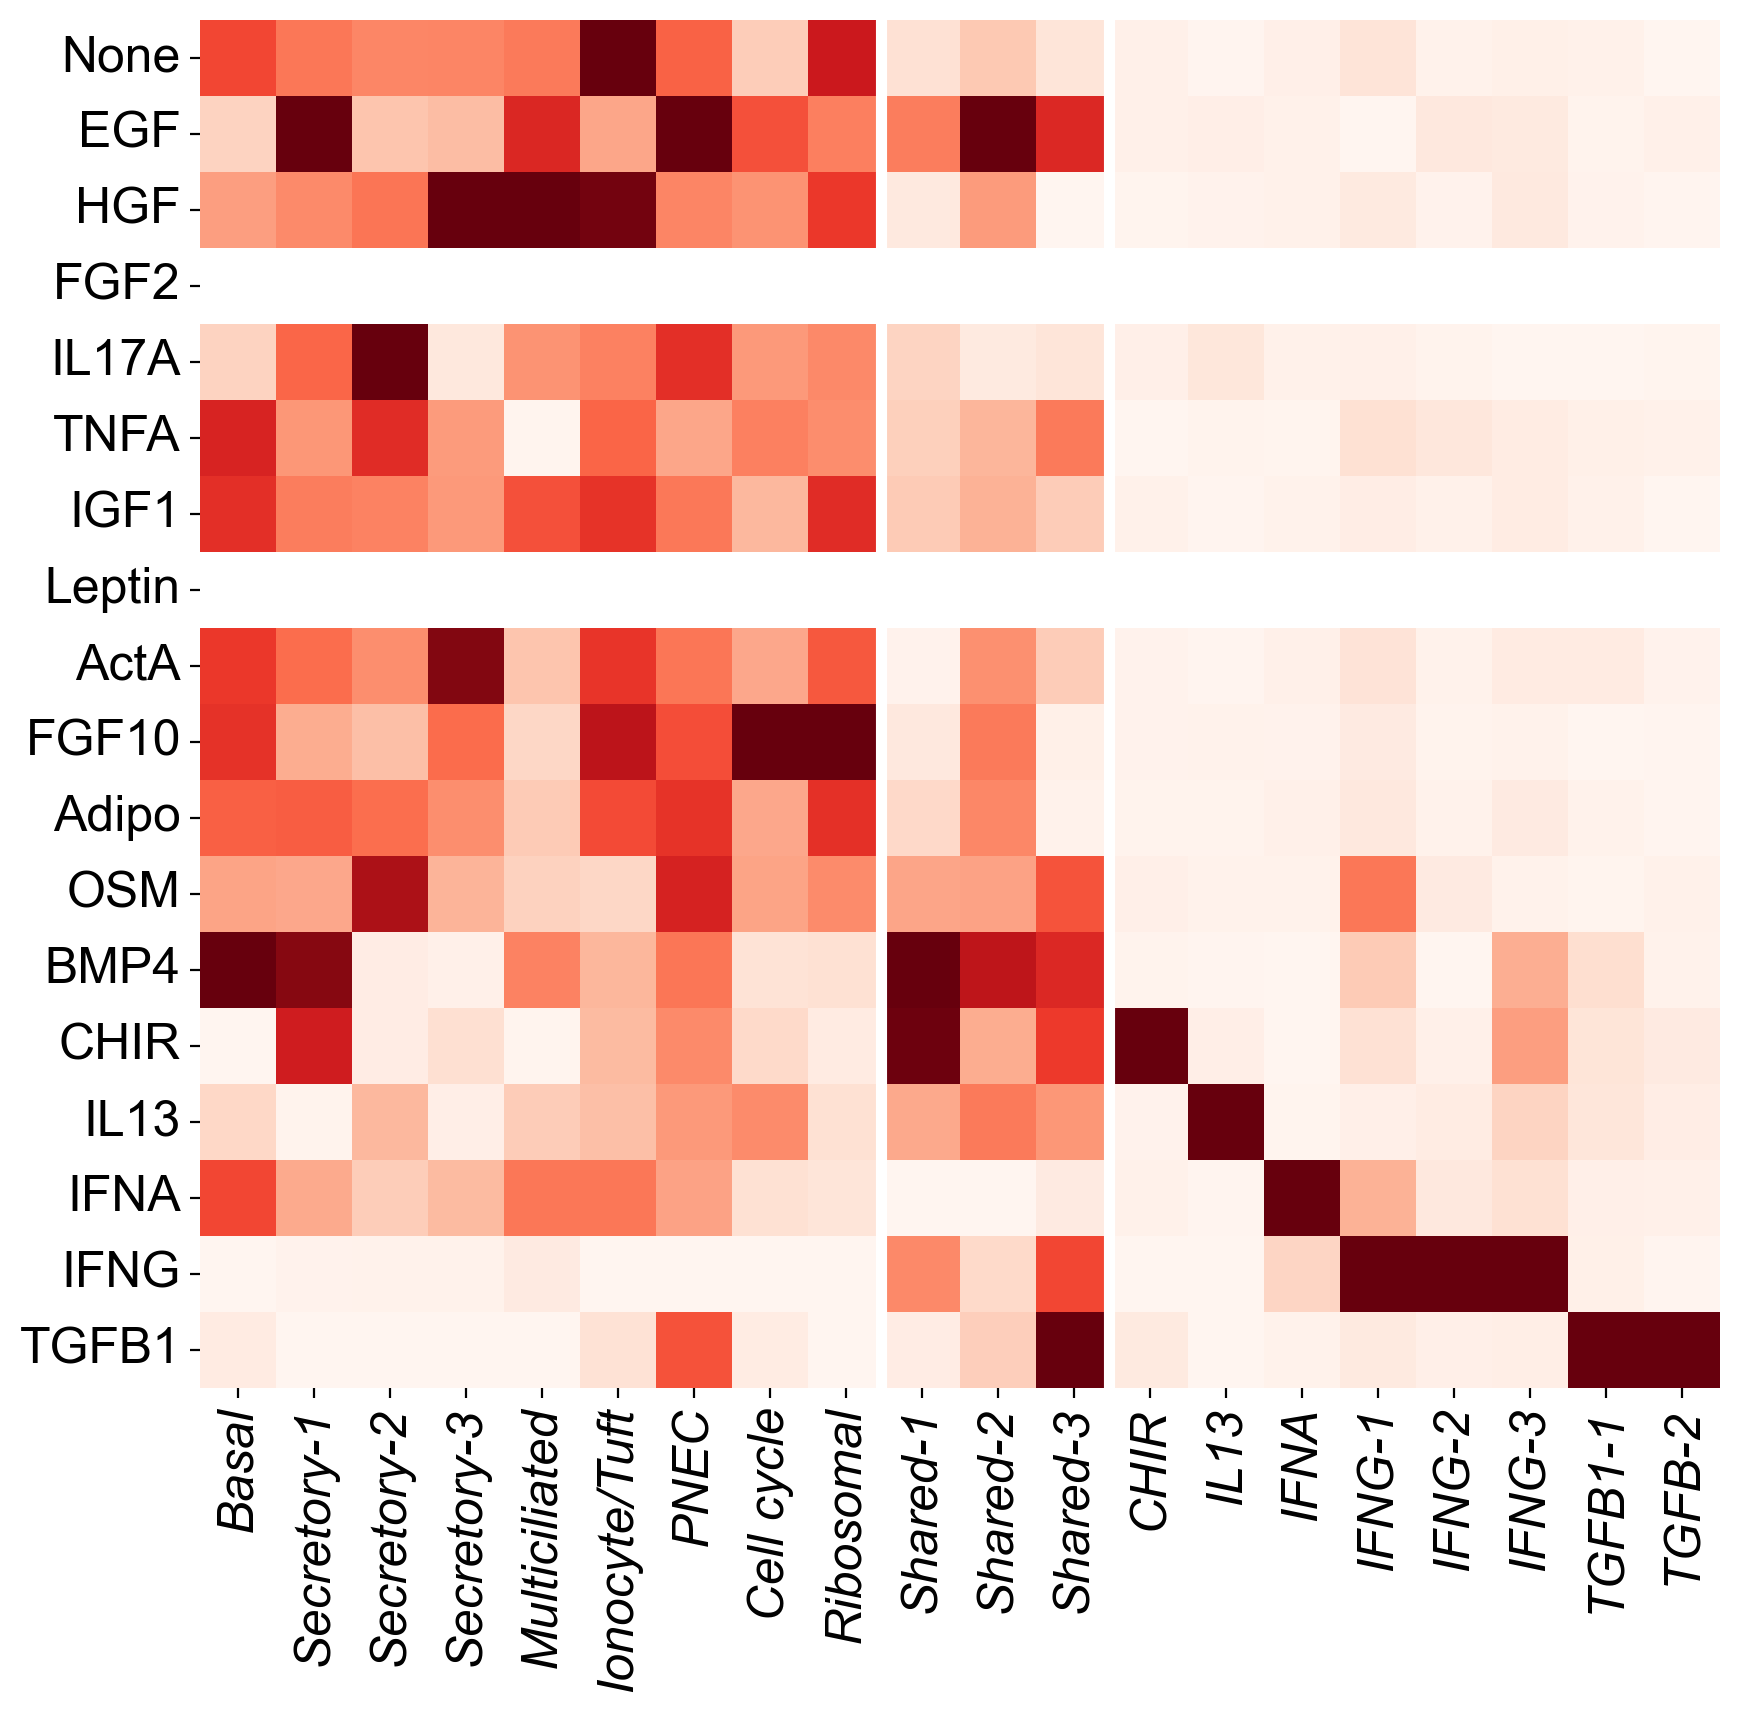

In [15]:
# plot heatmap:
f = pl.figure(figsize = (condition_usages3_pd.shape[1]/2,
                         condition_usages3_pd.shape[0]/2))
sn.heatmap(condition_usages3_pd_norm,
           cmap = 'Reds', square = True, cbar = False, yticklabels=condition_list)

#pl.axhline(1, color='white', lw=5)
pl.axvline(11.95, color='white', lw=4)

pl.axvline(8.95, color='white', lw=4)

pl.yticks(fontname = 'Arial', fontsize = 18)
bla = pl.xticks(np.arange(condition_usages3_pd.shape[1])+0.5, labels = program_names, 
                fontsize = 18, rotation = 90, style = 'italic')


## Mean usage over donors

In [16]:
mean_usage = pd.DataFrame(np.nanmean([condition_usages1_pd,condition_usages2_pd,condition_usages3_pd], axis=0))
mean_usage.index = condition_list
mean_usage.columns = program_names

mean_usage_norm = (mean_usage-mean_usage.min(0))/(mean_usage.max(0)-mean_usage.min(0))

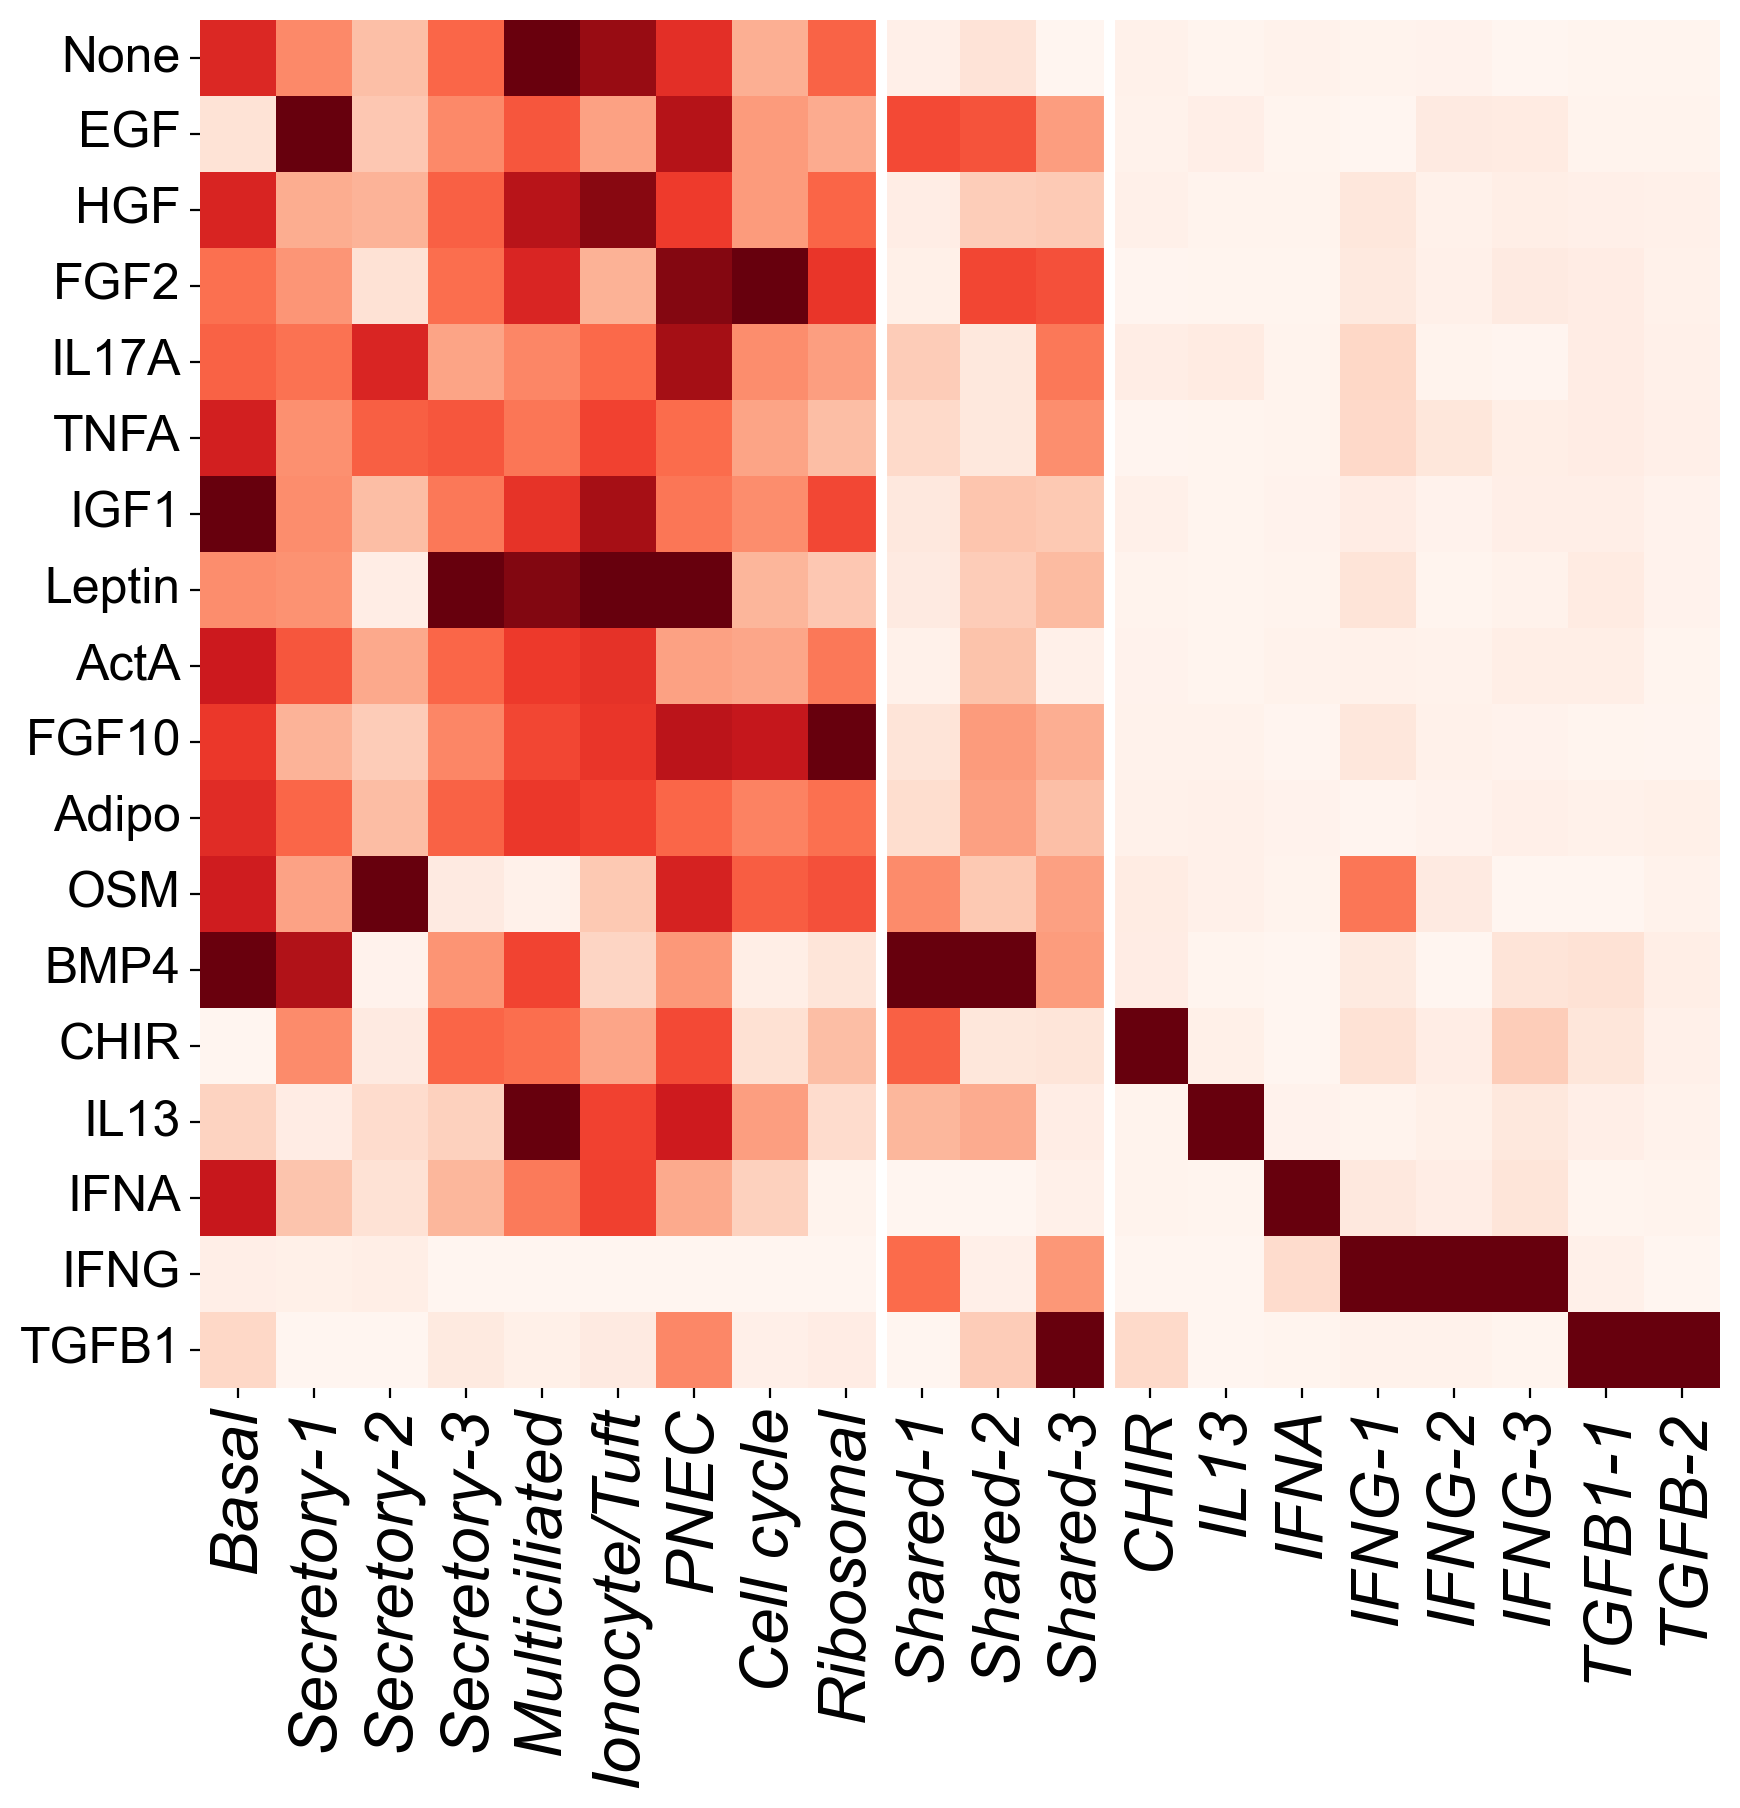

In [18]:
f = pl.figure(figsize = (mean_usage.shape[1]/2,
                         mean_usage.shape[0]/2))
sn.heatmap(mean_usage_norm,
           cmap = 'Reds', square = True, cbar = False,cbar_kws={"shrink": 0.5}, 
           yticklabels=condition_list, rasterized = True)
pl.axvline(11.95, color='white', lw=4)

pl.axvline(8.95, color='white', lw=4)

pl.yticks(fontname = 'Arial', fontsize = 18)
bla = pl.xticks(np.arange(mean_usage_norm.shape[1])+0.5, labels = program_names, 
                fontsize = 24, rotation = 90, style = 'italic')


f.savefig("../../figures/FigS5B_3C_pert_usage_donor_norm.pdf", bbox_inches='tight', dpi = 300)


## Fold changes

### Without min-max normalization

In [19]:
fc1 = condition_usages1_pd/condition_usages1_pd.loc['None']
fc2 = condition_usages2_pd/condition_usages2_pd.loc['None']
fc3 = condition_usages3_pd/condition_usages3_pd.loc['None']

In [20]:
mean_fc = pd.DataFrame(np.nanmean([fc1,fc2,fc3], axis=0))
mean_fc.index = condition_list
mean_fc.columns = program_names

In [21]:
conditions_names = ['Control', 'EGF', 'HGF', 'FGF2', 'IL17A', 'TNFA', 'IGF1', 'Leptin', 'ActA',
       'FGF10', 'Adipo', 'OSM', 'BMP4', 'CHIR', 'IL13', 'IFNA', 'IFNG',
       'TGFB1']

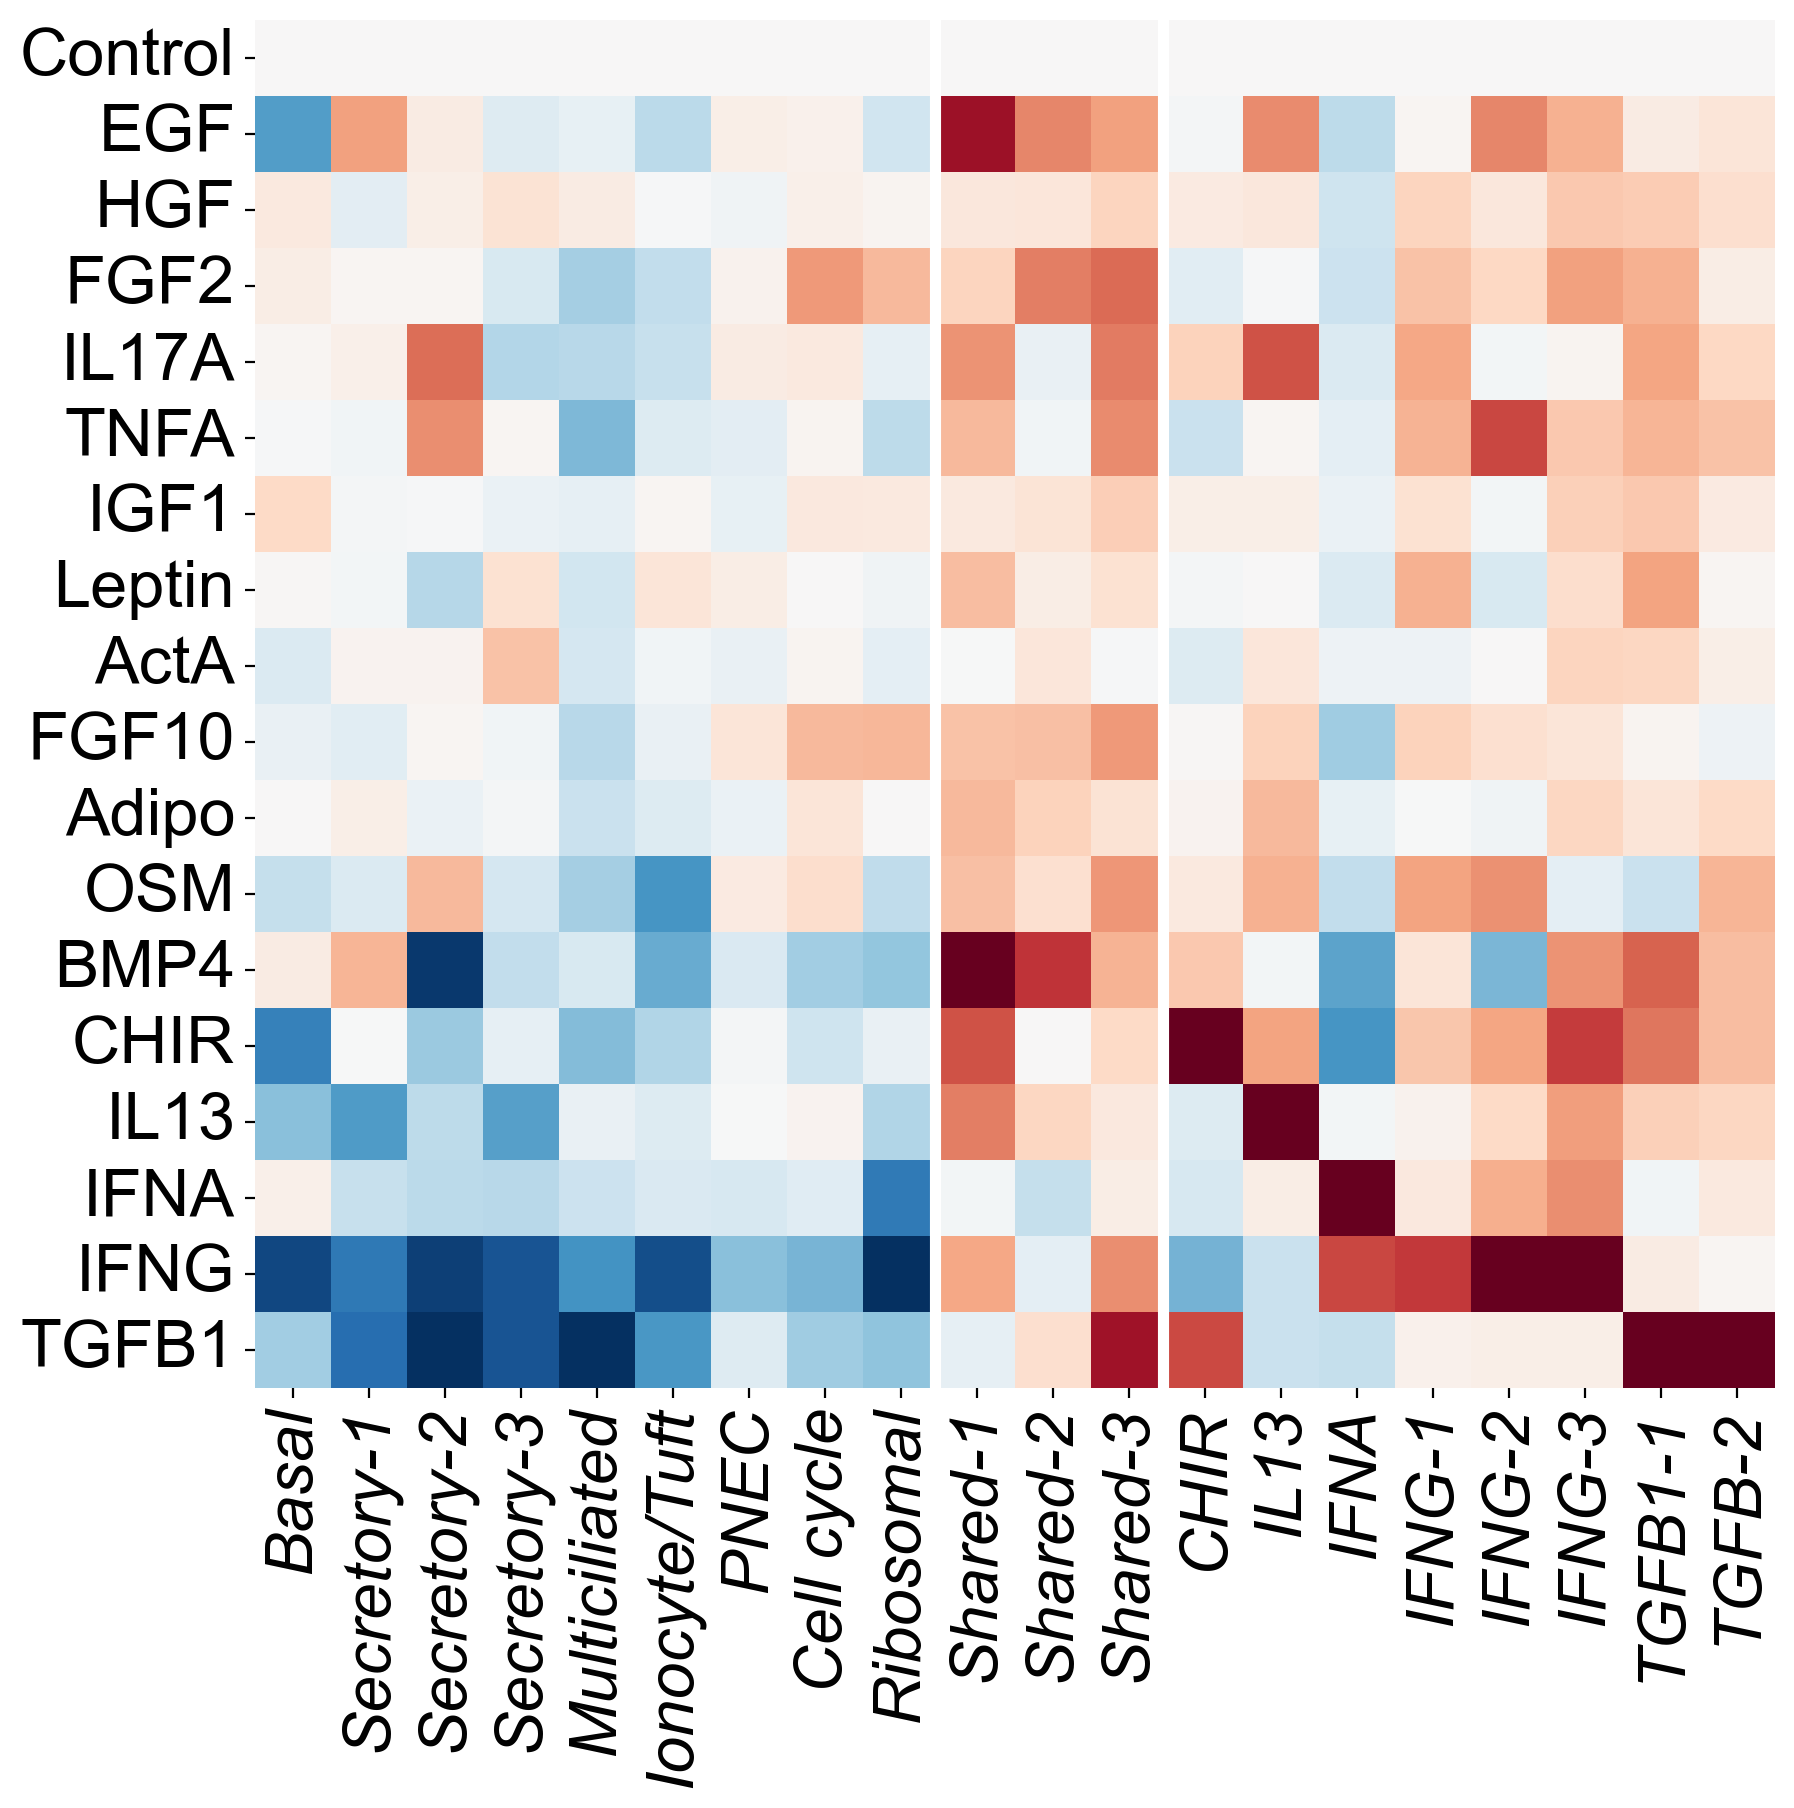

In [22]:
f = pl.figure(figsize = (mean_fc.shape[1]/2,
                         mean_fc.shape[0]/2))
sn.heatmap(np.log2(mean_fc),
           cmap = 'RdBu_r', square = True,  yticklabels=condition_list, vmax=3, vmin=-3,
           cbar=False,cbar_kws={"shrink": 0.5}, rasterized = True)
pl.axvline(11.95, color='white', lw=4)

pl.axvline(8.95, color='white', lw=4)

pl.yticks(fontname = 'Arial', fontsize = 18)
bla = pl.xticks(np.arange(mean_fc.shape[1])+0.5, labels = program_names, 
                fontsize = 24, rotation = 90, style = 'italic')

bla = pl.yticks(np.arange(mean_fc.shape[0])+0.5, labels = conditions_names, 
                fontsize = 24)
f.savefig("../../figures/FigS5B_pert_usage_log_mean_fc_donor.pdf", bbox_inches='tight', dpi = 300)



### Mean of logs instead of log of means

In [23]:
fc1_log = np.log2(condition_usages1_pd/condition_usages1_pd.loc['None'])
fc2_log = np.log2(condition_usages2_pd/condition_usages2_pd.loc['None'])
fc3_log = np.log2(condition_usages3_pd/condition_usages3_pd.loc['None'])

In [24]:
mean_fc_log = pd.DataFrame(np.nanmean([fc1_log,fc2_log,fc3_log], axis=0))
mean_fc_log.index = condition_list
mean_fc_log.columns = program_names

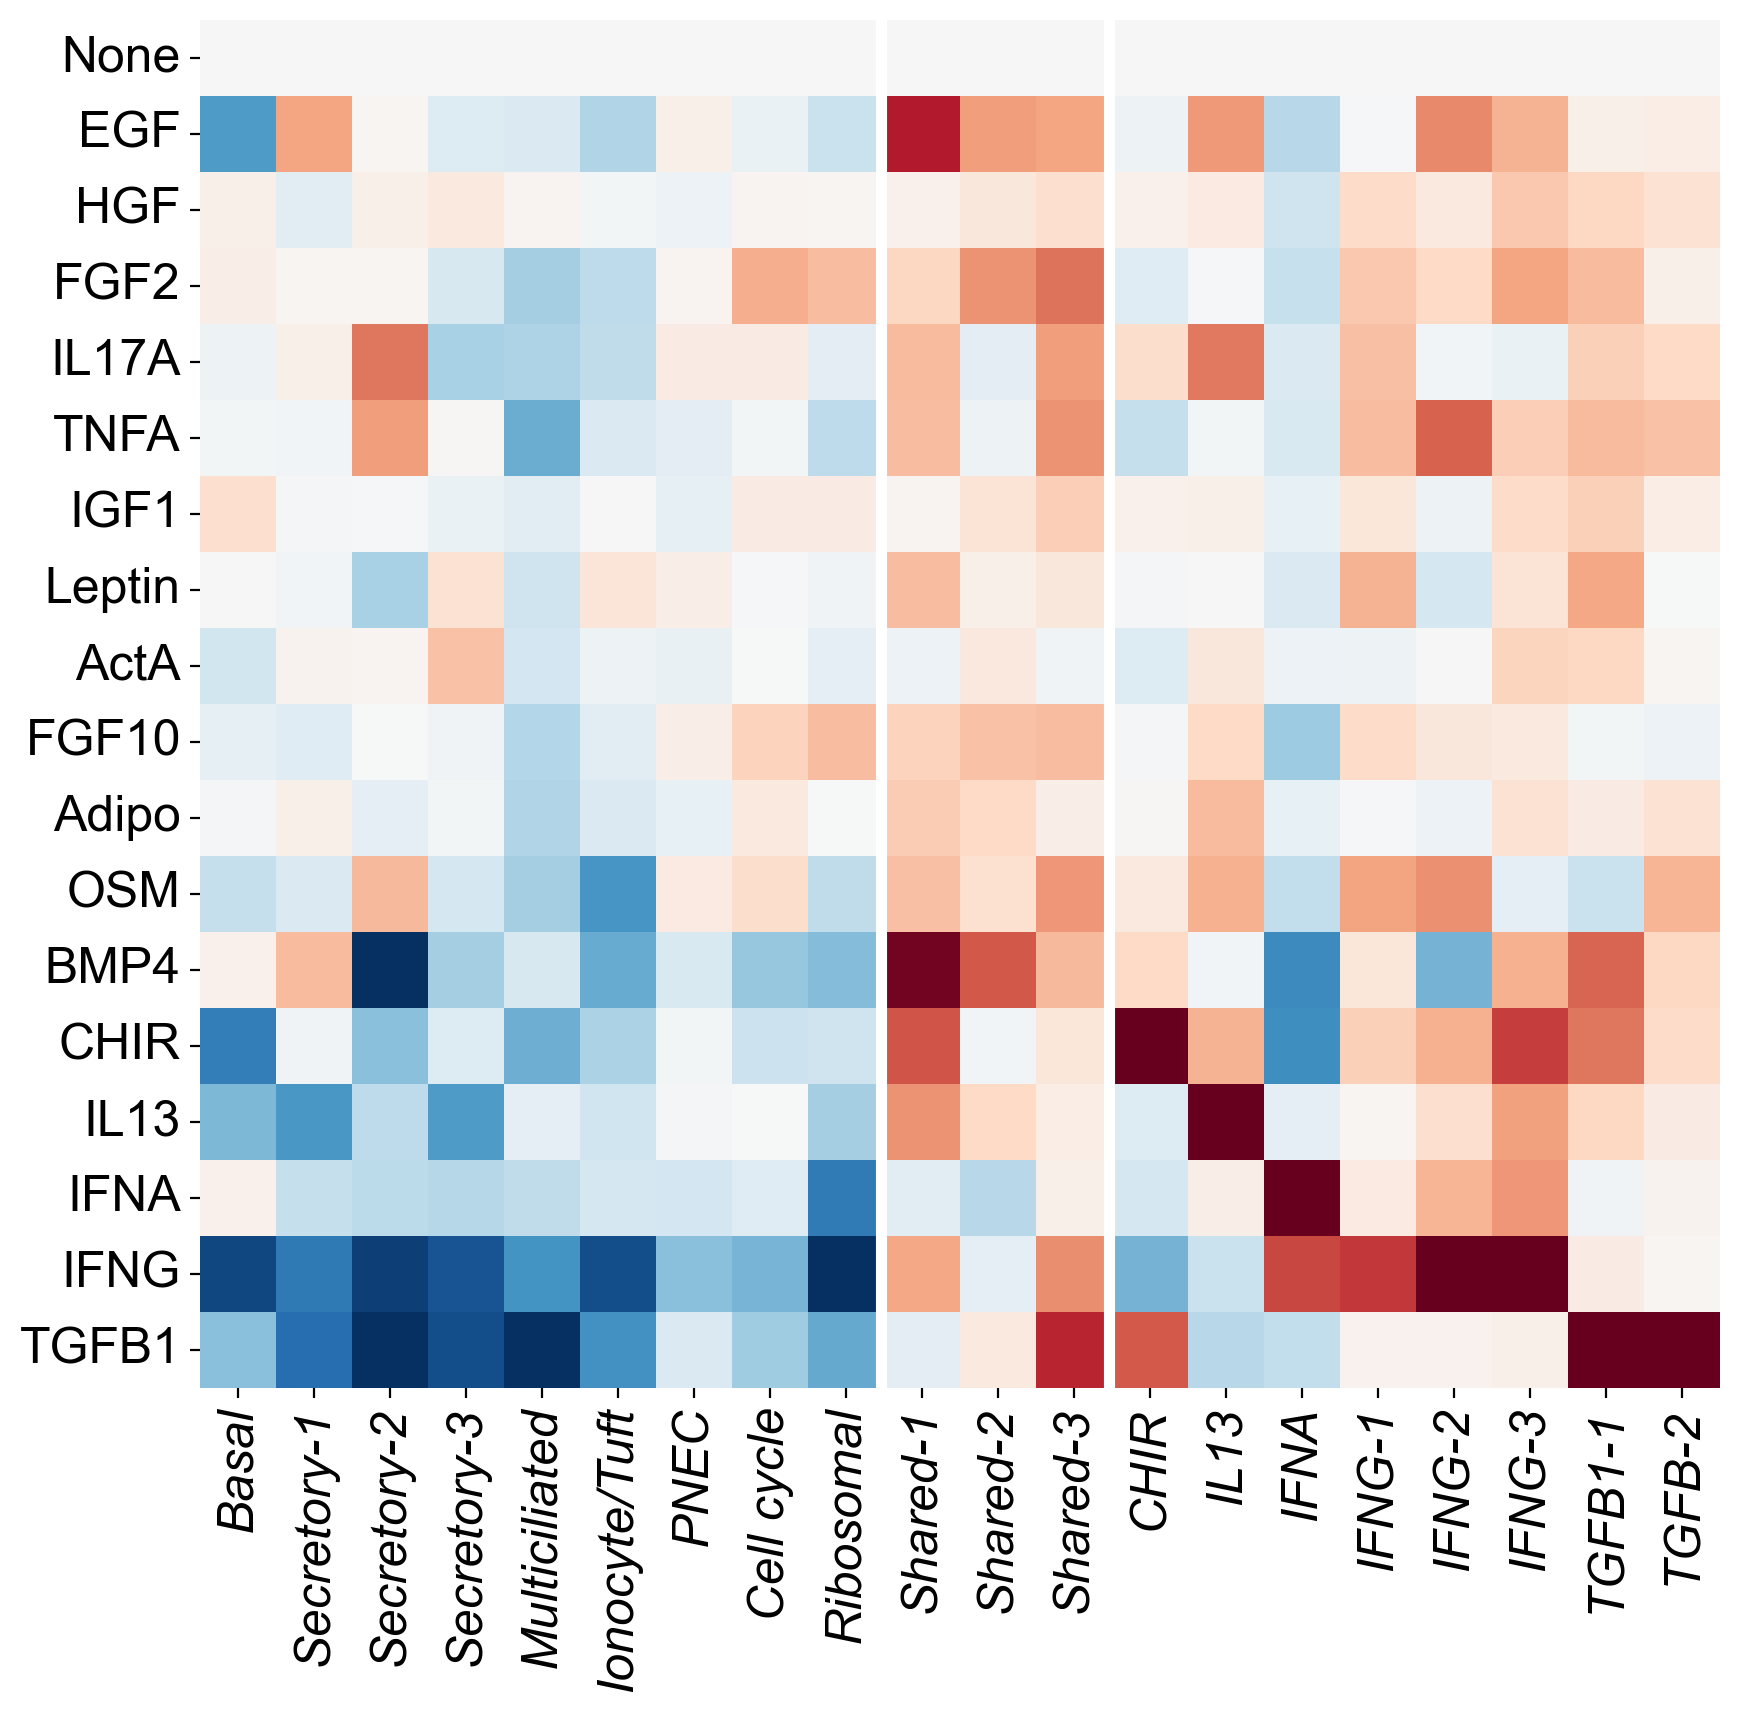

In [25]:
f = pl.figure(figsize = (mean_fc_log.shape[1]/2,
                         mean_fc_log.shape[0]/2))
sn.heatmap(mean_fc_log,
           cmap = 'RdBu_r', square = True,  yticklabels=condition_list, vmax=3, vmin=-3,cbar=False,cbar_kws={"shrink": 0.5}, 
          rasterized = True)
pl.axvline(11.95, color='white', lw=4)

pl.axvline(8.95, color='white', lw=4)

pl.yticks(fontname = 'Arial', fontsize = 18)
bla = pl.xticks(np.arange(mean_fc_log.shape[1])+0.5, labels = program_names, 
                fontsize = 18, rotation = 90, style = 'italic')

#f.savefig("../../figures/FigS5B_pert_usage_fc_donor.pdf", bbox_inches='tight', dpi = 300)
